kkkkk


In [2]:
import os

os.chdir('/home/ubuntu/nndl-project/')

from src.dataset import * # import ModelNetDataset class
from torch.utils.data import DataLoader
import pandas as pd
import matplotlib.pyplot as plt

metadata_path = '/home/ubuntu/nndl-project/data/modelnet10/metadata.csv'

dataset=ModelNetDataset(metadata_path,30,'all','npy')
loader=DataLoader(dataset,shuffle=True,batch_size=512)

In [ ]:
voxel_batch,orientation_class_batch,label_batch=next(iter(loader))

In [6]:
print(voxel_batch.shape)
print(orientation_class_batch.shape)
print(label_batch.shape)

torch.Size([512, 1, 30, 30, 30])
torch.Size([512])
torch.Size([512])


The `DataLoader` can be casted as an iterable that yields batches.

In [8]:
label_batch

tensor([7, 8, 7, 8, 1, 0, 7, 5, 9, 1, 8, 6, 9, 6, 1, 1, 8, 4, 6, 9, 0, 4, 8, 9,
        6, 6, 9, 6, 2, 5, 8, 0, 1, 8, 9, 8, 7, 0, 8, 1, 8, 1, 8, 9, 6, 8, 7, 0,
        5, 9, 1, 9, 6, 8, 1, 8, 1, 4, 8, 1, 2, 6, 8, 5, 7, 1, 3, 1, 8, 1, 9, 1,
        0, 9, 1, 7, 7, 3, 5, 5, 0, 1, 6, 8, 2, 4, 2, 8, 7, 2, 1, 1, 7, 1, 9, 4,
        5, 3, 0, 4, 6, 9, 1, 1, 1, 2, 7, 1, 2, 9, 1, 1, 9, 1, 9, 1, 3, 6, 6, 8,
        8, 1, 9, 1, 7, 4, 1, 0, 0, 0, 4, 6, 7, 0, 7, 3, 3, 9, 8, 7, 1, 4, 9, 1,
        8, 7, 6, 5, 0, 0, 6, 8, 3, 8, 7, 1, 6, 1, 8, 9, 9, 3, 1, 9, 1, 9, 1, 1,
        7, 9, 2, 0, 9, 1, 4, 2, 3, 1, 0, 4, 1, 7, 9, 7, 0, 0, 8, 3, 9, 1, 6, 6,
        1, 4, 4, 5, 1, 3, 0, 0, 8, 9, 6, 1, 4, 8, 0, 1, 8, 6, 6, 2, 2, 6, 0, 8,
        8, 8, 3, 1, 8, 7, 3, 0, 1, 8, 6, 2, 1, 4, 8, 4, 8, 4, 1, 8, 1, 4, 4, 1,
        6, 3, 9, 9, 1, 9, 6, 8, 6, 4, 1, 1, 7, 9, 4, 9, 5, 4, 1, 8, 9, 0, 1, 1,
        4, 1, 6, 3, 1, 5, 3, 8, 2, 8, 9, 7, 1, 5, 4, 7, 8, 0, 4, 5, 4, 4, 5, 5,
        1, 4, 6, 5, 8, 7, 3, 1, 0, 1, 6,

torch.Size([512, 1, 30, 30, 30])
torch.Size([512])
torch.Size([512])


NameError: name 'int_to_label' is not defined

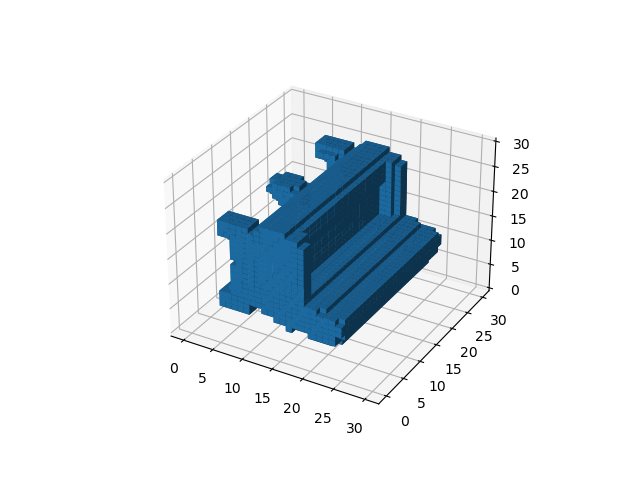

In [9]:
%matplotlib widget

i=1

ax = plt.figure().add_subplot(projection='3d')
ax.voxels(voxel_batch[i,0])
ax.set_title()
plt.show()

# Orientation classes mode

In [7]:
# if you specify the orientation_classes metadata path, it will trigger orientation classes mode
orientation_classes_path = '/home/ubuntu/nndl-project/data/modelnet10/orientation_classes.csv'
dataset = ModelNetDataset(metadata_path=metadata_path,N=30,split='train',orientation_classes_path=orientation_classes_path)
loader = DataLoader(dataset,2,shuffle=True,num_workers=8)

In [8]:
voxel_batch,orientation_batch,label_batch=next(iter(loader))

In [9]:
print(voxel_batch.shape)
print(orientation_batch.shape)
print(label_batch.shape)

torch.Size([2, 1, 30, 30, 30])
torch.Size([2])
torch.Size([2])


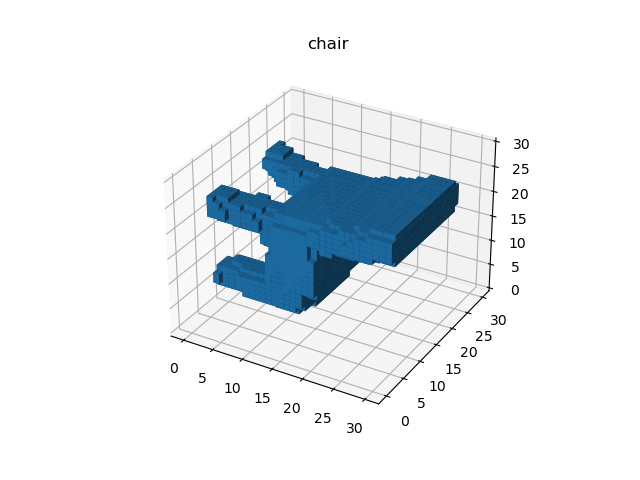

In [11]:
%matplotlib widget

i=1

ax = plt.figure().add_subplot(projection='3d')
ax.voxels(voxel_batch[i,0])
ax.set_title(int_to_label[label_batch[i].item()])
plt.show()

In [13]:
from torch.nn.functional import one_hot

one_hot(orientation_batch,num_classes=10*4)

tensor([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [14]:
one_hot(label_batch,num_classes=10)

tensor([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])